In [1]:
#Importing packages
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import os
import statsmodels.api as sm
import glob
# assign a constant figure size and use it in plotting to make plots larger
FIG_SIZE = (10,10)

In [6]:
# get all filenames under the data directory 
f = [pd.read_csv(filename) for filename in glob.glob('*.csv')]

# check the list size to understand how many files will be read
# should be equal to 50
print(len(f))

#  create the dataset using all files under the data directory
df = pd.concat(f, axis=0)
df.head()

50


sale_time purchaser_gender
0  2013-01-07 02:14:07           female
1  2013-01-07 02:57:53             male
2  2013-01-07 02:59:49           female
3  2013-01-07 03:02:53             male
4  2013-01-07 03:27:36           female

In [9]:
# Making sure the sales time data is actually in date time format
sales_day = pd.to_datetime(df['sale_time'])

<p>Create a new dataframe called daily sales, the dataframe is grouped by the sales_day column.</p>
<p>The sales_day column, which is currently the index. uses dt.floor and gets the 'day' in the datetime</p>
<p>Using size() to get the count of sales within that day. and reset_index so sales_day is no longer the index</p>

In [39]:
daily_sales = sales_day.groupby(sales_day.dt.floor('d')).size().reset_index(name = "Count of Sales")
daily_sales.head()


sale_time  Count of Sales
0 2012-10-01             514
1 2012-10-02             482
2 2012-10-03             499
3 2012-10-04             546
4 2012-10-05             476

In [46]:
# Renaming sale_time to sale_day
daily_sales.rename(columns={'sale_time':'sale_day'}, inplace =True)
daily_sales.head()

sale_day  Count of Sales
0 2012-10-01             514
1 2012-10-02             482
2 2012-10-03             499
3 2012-10-04             546
4 2012-10-05             476

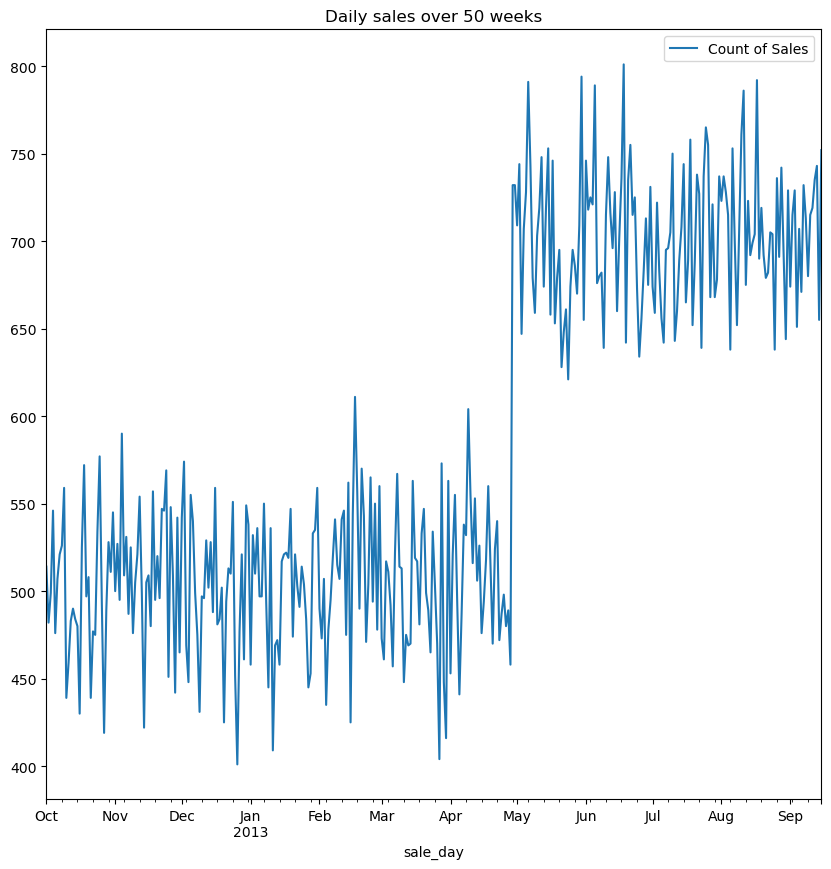

In [47]:
# Make sales_day the index to use it in plotting
daily_sales.index = daily_sales['sale_day']
daily_sales.drop(columns=['sale_day'],inplace = True)
#Plot Showing Daily sales for every week
daily_sales.plot(figsize=FIG_SIZE, title = "Daily sales over 50 weeks")
plt.show()

Count of Sales
sale_day                  
2012-10-01             514
2012-10-02             482
2012-10-03             499
2012-10-04             546
2012-10-05             476